## How did social media shape the spread of the #MeToo movement, and how have public opinions evolved over time?
idea: check on wikipedia pageview for #MeToo and where there was a lot of traffic. (maybe heatmap if there are too many time series?)
use this date to check for youtube videos in that time, see how people felt/reacted to the trend. 
check videos at the beginning of hype, the middle of hype and then the last 3 years, and how the opinions have changed (sentiment analysis tool, textblob?)

            views
timestamp        
01.01.2021    391
01.02.2021    420
01.03.2021    379
01.04.2021    271
01.05.2021    195
01.06.2021    226
01.07.2021   1122
01.08.2021    250
01.09.2021    177
01.10.2021    210
01.11.2021    176
01.12.2021    173
01.01.2022  38914
01.02.2022  63465
01.03.2022  69773
01.04.2022  70106
01.05.2022  81198
01.06.2022  72925
01.07.2022  55460
01.08.2022  57312
01.09.2022  61945
01.10.2022  79897
01.11.2022  75811
01.12.2022  61857
01.01.2023  67606
01.02.2023  59192
01.03.2023  70630
01.04.2023  55680
01.05.2023  60168
01.06.2023  85133
01.07.2023  68298
01.08.2023  66018
01.09.2023  78732
01.10.2023  85864
01.11.2023  75166
01.12.2023  73033
01.01.2024  80214
01.02.2024  62741
01.03.2024  84862
01.04.2024  78297
01.05.2024  79652
01.06.2024  65140
01.07.2024  64276
01.08.2024  67306
01.09.2024  72407
01.10.2024  75410
01.11.2024  69923
01.12.2024  61160
01.01.2025  63079
01.02.2025  50364
01.03.2025  54758
01.04.2025  55109
01.05.2025  52013
01.06.2025

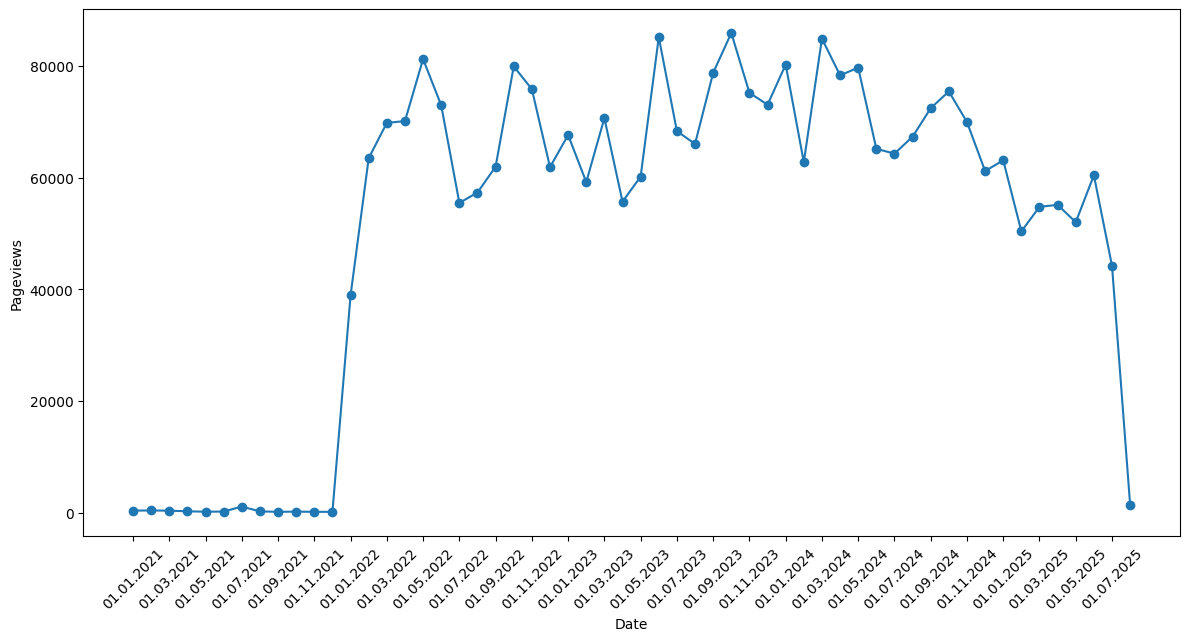

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import requests as rq
from scipy.signal import find_peaks

headers = {
    "User-Agent": "Wikimedia Analytics API Tutorial (Dianer) compare-page-metrics.py",
}
view_url = """https://wikimedia.org/api/rest_v1/metrics/pageviews/\
per-article/en.wikipedia.org/all-access/all-agents/\
MeToo_movement/monthly/20210101/20250801"""

view_response = rq.get(view_url, headers=headers).json()
view_df = pd.DataFrame.from_records(view_response["items"])
view_df = view_df.set_index("timestamp")
view_df = view_df.drop(columns=["project", "article", "granularity", "access", "agent"])

view_df.index = pd.to_datetime(view_df.index, format="%Y%m%d%H", utc=True)
view_df.index = view_df.index.strftime("%d.%m.%Y")

print(view_df)

plt.figure(figsize=(12,6))
plt.plot(view_df.index, view_df['views'], marker='o')
plt.xlabel("Date")
plt.ylabel("Pageviews")
plt.tight_layout()
plt.xticks(view_df.index[::2], rotation=45)
plt.show()

In [ ]:
from googleapiclient.discovery import build
from collections import OrderedDict
api_key = ""
youtube = build("youtube", "v3", developerKey= api_key)

# Setting parameters for video search in the recent 3 years
all_videos = []
next_page_token = None
max_pages = 1
current_page = 0

while current_page < max_pages:
    request = youtube.search().list(
        q="#MeToo",
        maxResults=25,
        part="snippet",
        order="relevance",
        type="video",
        publishedAfter = "2022-01-01T00:00:00Z",
        videoCategoryId = "25",  #filters for politics &
        pageToken=next_page_token
    )
    response = request.execute()
    all_videos.extend(response["items"])

    next_page_token = response.get("nextPageToken")
    current_page += 1
    
#List of video ids
ids = []
for item in all_videos:
    ids.append(item["id"]["videoId"])

#handle duplicates 
unique_ids= list(set(ids))
print(unique_ids)

titles = []
for item in all_videos:
    titles.append(item["snippet"]["title"])
    

#getting comments for each video
all_comments = [] 
for videoid in unique_ids:
    video_comments = []
    try: 
      request = youtube.commentThreads().list(
        part="snippet",
        videoId= videoid,
        maxResults= 1,
        testFormat="plainText",
        order= "relevance"        
    )
      response = request.execute()
      for c in response.get("items", []):
         video_comments.append(c["snippet"]["topLevelComment"]["snippet"]["textDisplay"])
          
    #Comments disabled
    except Exception as e:
        continue
    all_comments.append(video_comments)

descriptions =[]
for video_id in unique_ids:
    try:
        request = youtube.videos().list(
            part="snippet",
            id=video_id
        )
        response = request.execute()
        for item in response.get("items", []):
            description = item["snippet"].get("description", "")
            descriptions.append(description)

    except Exception as e:
         continue
        
final_data = all_comments + titles + descriptions
print(final_data)



['kGueqjcM7x4', 'ftEzP7Mh68I', '-BRiXq13qc8', 'VautfhiGl_U', 'QKzh7Uxdj4Y', 'H6b3_BcuyAw', 'u1Rb7TGgsp4', '2GU7b0Qsdno', 'xrmOgiLryrk', 'fSbFFwHDzQo', 'OwKVJS9UNjw', 'tEnZL92ywIk', 'NiftLxLq4Xc', 'LZNfyXv1VNU', 'oPDSKdUTSv8', 'ya3OJruUjvU', '8Dx97dhlQek', 'ATYK2svJ6eM', '2J5nGCSd8iU', '9VO5va9ylMM', 'Yfz67QSbBc4', 'o4DcCcwnmLA', 'uBIVyUj1NkU', 'bai2rGLqKkk', 'tbCB6-oY6s0']
['The legacy of the ‘Me Too’ movement 5 years later', 'MeToo movement has ‘absolutely destroyed’ men', 'Diddy Verdict Challenges #MeToo Movement', 'Has #MeToo Left Men Living In Fear Of Women?', 'Founder of &quot;Me Too&quot; movement speaks out', 'Mollywood&#39;s #MeToo Moment: More Heads Roll | Vantage with Palki Sharma', 'How #MeToo DESTROYED Johnny Depp | Myron Gaines', '&quot;Me Too&quot;: World-Wide Call for Action to Tackle Violence Against Women', 'Woody Allen supports the #MeToo movement', 'The Big Problem With #MeToo', 'Tarana Burke On How The #MeToo Movement Started And Where It’s Headed', 'Is #metoo movem